In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rawio.IO as io
import glob
import pickle
from tqdm import tqdm_notebook
from scdmsPyTools.Traces.Filtering import *
from scdmsPyTools.Traces.Noise import *
from scdmsPyTools.TES.Templates import *
from scdmsPyTools.Traces.Stats import *
#from scdmsPyTools.BatTools.IO import *
from rawio import IO
import joblib
import os
from ROOT import TCanvas, TGraph
from ROOT import TF1, TH1F
from ROOT import gStyle
import uproot

Welcome to JupyROOT 6.22/00


In [2]:
#procdir = "/gpfs/slac/staas/fs1/g/supercdms/tf/nexus/midasdata/NEXUS/R7/processed/auto_proc/OFResults_"
#procdir = "/gpfs/slac/staas/fs1/g/supercdms/tf/nexus/midasdata/NEXUS/R7/processed/master_releases/v2.0.0/OFResults_"
rawdir = "/gpfs/slac/staas/fs1/g/supercdms/tf/umn/raw/"
procdir = "/gpfs/slac/staas/fs1/g/supercdms/tf/umn/rq/"
series='07181007_1415'
procseries='07191122_0915/'

In [4]:
events=io.getRawEvents(rawdir,series)

The file is: /gpfs/slac/staas/fs1/g/supercdms/tf/umn/raw//07181007_1415/07181007_1415_F0001.mid.gz

Opened raw midas file: /gpfs/slac/staas/fs1/g/supercdms/tf/umn/raw//07181007_1415/07181007_1415_F0001.mid.gz
The file is: /gpfs/slac/staas/fs1/g/supercdms/tf/umn/raw//07181007_1415/07181007_1415_F0001.mid.gz

Opened raw midas file: /gpfs/slac/staas/fs1/g/supercdms/tf/umn/raw//07181007_1415/07181007_1415_F0001.mid.gz
The file is: /gpfs/slac/staas/fs1/g/supercdms/tf/umn/raw//07181007_1415/07181007_1415_F0002.mid.gz

Opened raw midas file: /gpfs/slac/staas/fs1/g/supercdms/tf/umn/raw//07181007_1415/07181007_1415_F0002.mid.gz
The file is: /gpfs/slac/staas/fs1/g/supercdms/tf/umn/raw//07181007_1415/07181007_1415_F0003.mid.gz

Opened raw midas file: /gpfs/slac/staas/fs1/g/supercdms/tf/umn/raw//07181007_1415/07181007_1415_F0003.mid.gz
The file is: /gpfs/slac/staas/fs1/g/supercdms/tf/umn/raw//07181007_1415/07181007_1415_F0004.mid.gz

Opened raw midas file: /gpfs/slac/staas/fs1/g/supercdms/tf/umn/r

In [5]:
type(events)

pandas.core.frame.DataFrame

In [6]:
events.keys()

MultiIndex(levels=[['Z1', 'Z2', 'Z3', 'Z4'], ['PA', 'PB', 'PC', 'PD', 'QI', 'QO']],
           codes=[[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3], [4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3]])

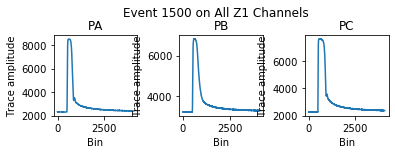

In [7]:
channels=['PA','PB','PC']

fig = plt.figure()
fig.subplots_adjust(hspace=0.7, wspace=0.5)

for j,channel in enumerate(channels):
    plt.subplot(2,3,j+1)
    plt.plot(events['Z1'][channel][1500]) # index 0 corresponds to first event
    plt.title(channel)
    plt.xlabel('Bin')
    plt.ylabel('Trace amplitude')

plt.suptitle('Event 1500 on All Z1 Channels')
plt.show()

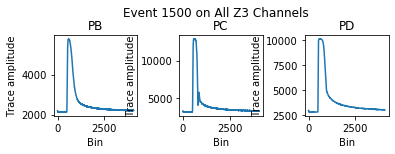

In [8]:
channels2=['PB','PC','PD']

fig = plt.figure()
fig.subplots_adjust(hspace=0.7, wspace=0.5)

for j,channel in enumerate(channels2):
    plt.subplot(2,3,j+1)
    plt.plot(events.Z3[channel][1500]) # index 0 corresponds to first event
    plt.title(channel)
    plt.xlabel('Bin')
    plt.ylabel('Trace amplitude')

plt.suptitle('Event 1500 on All Z3 Channels')
plt.show()

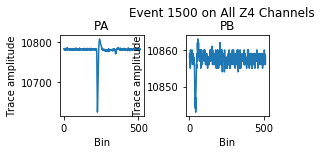

In [9]:
channels2=['PA','PB']

fig = plt.figure()
fig.subplots_adjust(hspace=0.7, wspace=0.5)

for j,channel in enumerate(channels2):
    plt.subplot(2,3,j+1)
    plt.plot(events.Z4[channel][1500]) # index 0 corresponds to first event
    plt.title(channel)
    plt.xlabel('Bin')
    plt.ylabel('Trace amplitude')

plt.suptitle('Event 1500 on All Z4 Channels')
plt.show()

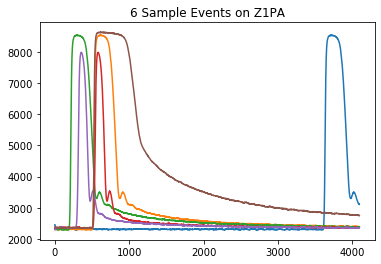

In [10]:
plt.figure()

for j in range(1499,1505):
    plt.plot(events.Z1.PA[j]) # iterate over the first 20 events

plt.title('6 Sample Events on Z1PA')
plt.show()

In [13]:
events['Z1']['PA'][0]

array([2490, 2487, 2486, ..., 2479, 2480, 2483], dtype=int32)

/cvmfs/sft.cern.ch/lcg/views/LCG_98py3cu10/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/cvmfs/sft.cern.ch/lcg/views/LCG_98py3cu10/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


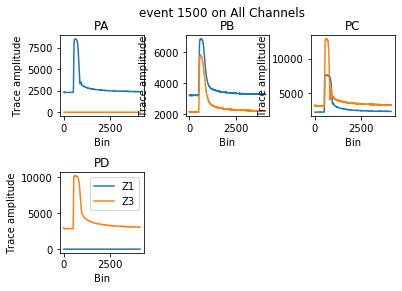

In [11]:
zips=['Z1','Z3']
channels=['PA','PB','PC','PD']

fig = plt.figure()
fig.subplots_adjust(hspace=0.7, wspace=0.5)
for i,zips in enumerate(zips):
    plt.subplot(2,3,i+1) 
    for j,channel in enumerate(channels):
        plt.subplot(2,3,j+1)
        plt.plot(events[zips][channel][1500],label=zips) # index 0 corresponds to first event
        plt.title(channel)
        plt.xlabel('Bin')
        plt.ylabel('Trace amplitude')

plt.suptitle('event 1500 on All Channels')
plt.legend()
plt.show()

In [17]:
#Re-map events to actual channels
zips=['Z1','Z3']
channels=['PA','PB','PC','PD']

for zips in (zips):
    for channels in (channels):
        for i in (events[zips][channels]):
            if zips=='Z1':
                if channels=='PA':
                    eventsMap['PE'][i]=dict()
                    eventsMap['PE'][i].append(events[zips][channels][i])
                elif channels=='PB':
                    eventsMap['PB'][i]=dict()
                    eventsMap['PB'][i].append(events[zips][channels][i])
                elif channels=='PC':
                    eventsMap['PD'][i]=dict()
                    eventsMap['PD'][i].append(events[zips][channels][i])
            elif zips=='Z3':
                if channels=='PB':
                    eventsMap['PA'][i]=dict()
                    eventsMap['PA'][i].append(events[zips][channels][i])
                elif channels=='PC':
                    eventsMap['PC'][i]=dict()
                    eventsMap['PC'][i].append(events[zips][channels][i])
                elif channels=='PD':
                    eventsMap['PF'][i]=dict()
                    eventsMap['PF'][i].append(events[zips][channels][i])

TypeError: unhashable type: 'numpy.ndarray'

In [18]:
eventsMap['PA']

{}

KeyError: 1500

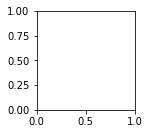

In [19]:
for j,channel in enumerate(detchan):
        plt.subplot(2,3,j+1)
        plt.plot(eventsMap[channel][1500]) # index 0 corresponds to first event
        plt.title(channel)
        plt.xlabel('Bin')
        plt.ylabel('Trace amplitude')

plt.suptitle('Event 1500 on All Channels')
plt.legend()
plt.show()

In [134]:
RQ[1].allkeys()

[b'infoDir;1',
 b'infoDir/processingTree;1',
 b'infoDir/userSettingsTree;1',
 b'infoDir/filterTreeZip1;1',
 b'detectorConfigDir;1',
 b'detectorConfigDir/detectorConfigZip1;1',
 b'rqDir;1',
 b'rqDir/eventTree;1',
 b'rqDir/zip1;1']

In [111]:
PTOFamps=[]
for i in range(1,10):
    PTOFamps.extend(RQ[i]['rqDir/zip1']['PTOFamps'].array()[RQ[i]['rqDir/eventTree']['EventCategory'].array()==0])

In [112]:
for i in range(11,20):
    PTOFamps.extend(RQ[i]['rqDir/zip1']['PTOFamps'].array()[RQ[i]['rqDir/eventTree']['EventCategory'].array()==0])

In [113]:
for i in range(21,29):
    PTOFamps.extend(RQ[i]['rqDir/zip1']['PTOFamps'].array()[RQ[i]['rqDir/eventTree']['EventCategory'].array()==0])

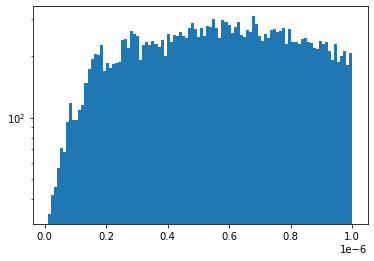

In [114]:
plt.hist(PTOFamps,bins=100,range=[1e-8,1e-6])
plt.yscale('log')

plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

In [115]:
PFS1OFamps=[]
for i in range(1,10):
    PFS1OFamps.extend(RQ[i]['rqDir/zip1']['PFS1OFamps'].array()[RQ[i]['rqDir/eventTree']['EventCategory'].array()==0])

In [116]:
for i in range(11,20):
    PFS1OFamps.extend(RQ[i]['rqDir/zip1']['PFS1OFamps'].array()[RQ[i]['rqDir/eventTree']['EventCategory'].array()==0])

In [117]:
for i in range(21,29):
    PFS1OFamps.extend(RQ[i]['rqDir/zip1']['PFS1OFamps'].array()[RQ[i]['rqDir/eventTree']['EventCategory'].array()==0])

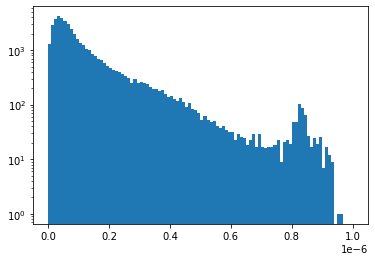

In [118]:
plt.hist(PFS1OFamps,bins=100,range=[0,1e-6])
plt.yscale('log')

plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

In [119]:
PFS2OFamps=[]
for i in range(1,10):
    PFS2OFamps.extend(RQ[i]['rqDir/zip1']['PFS2OFamps'].array()[RQ[i]['rqDir/eventTree']['EventCategory'].array()==0])

In [120]:
for i in range(11,20):
    PFS2OFamps.extend(RQ[i]['rqDir/zip1']['PFS2OFamps'].array()[RQ[i]['rqDir/eventTree']['EventCategory'].array()==0])

In [121]:
for i in range(21,29):
    PFS2OFamps.extend(RQ[i]['rqDir/zip1']['PFS2OFamps'].array()[RQ[i]['rqDir/eventTree']['EventCategory'].array()==0])

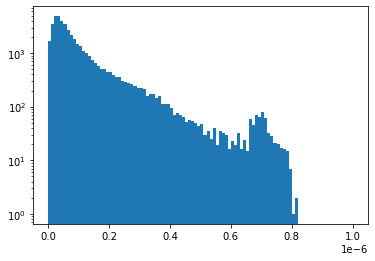

In [124]:
plt.hist(PFS2OFamps,bins=100,range=[0,1e-6])
plt.yscale('log')

plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))